(a) (5 points) Calculate the relative total mass of stars below 1 solar mass to stars above 1 solar mass in a Salpeter IMF versus a Kroupa et al. (1993) IMF ( a 3 power law segment IMF, see slide 13 in presentation Download slide 13 in presentationfor details), normalizing them to have the same number of stars above 1 solar mass. Use a lower cutoff mass of 0.07 solar masses and an upper cutoff mass of 100 solar masses. Remember that an IMF is a continuous function, and do this analytically. What are the implications for estimating a total stellar mass based on galaxy luminosity?



For Salpeter IMF, 
$$dN/dM = A M^{-2.35}$$ 
where we'll set the normalization $A=1$ and work in solar masses.
We'll integrate from 0.07 to 100 solar masses to get total mass:
$$\int_{0.07}^{100} M dN/dM dM = \int_{0.07}^{100} M^{-1.35} dM = {1.\over -0.35} 100^{-0.35}-0.07^{-0.35} = 6.68$$

For KTG IMF, we have 
$$dN/dM = A M^{-2.7}$$ for M>1, 
$$dN/dM = A M^{-2.2}$$ for $0.5<M<1$,
$$dN/dM = A (0.5)^{(-2.2+1.3)} M^{-1.3}$$ for $M<0.5$ for same normalization at
one solar mass as Salpeter, but make sure function is continuous at $M=0.5$. Then integrate to get
total mass:
$$\int_{0.07}^{100} M dN/dM dM = 3.34$$

This is for a normalization that sets the number of stars at 1 solar mass to be the same in both IMFs. In this case, the Salpeter IMF has about twice the mass as the KTG IMF.

Plot these up.


Text(0, 0.5, 'dN/dM')

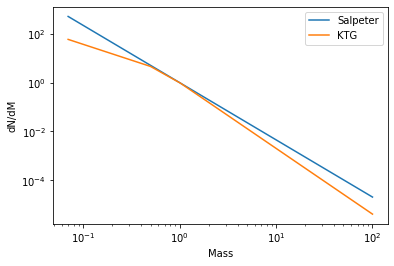

In [96]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def salpeter(m, slope=-2.35) :
    """ Salpeter IMF, single power law
    """
    return m**slope

def ktg(m) :
    """ KTG IMF, 3-segment power law
    """
    # for efficiency, initialize output array and fill 3 sections separately
    imf = np.zeros(np.shape(m))
    j=np.where(m>1)[0]
    imf[j] = m[j]**-2.7
    j=np.where((m>0.5)&(m<=1))[0]
    imf[j] = m[j]**-2.2
    j=np.where(m<=0.5)[0]
    imf[j] = 0.5**(-2.2+1.3)*m[j]**-1.3
    return imf
    
mass=np.arange(0.07,100,0.01)
plt.plot(mass,salpeter(mass),label='Salpeter')
plt.plot(mass,ktg(mass),label='KTG')
plt.legend()
plt.loglog()
plt.xlabel('Mass')
plt.ylabel('dN/dM')

The question actually suggested normalizing the IMFs to be equal number of stars above 1 solar mass. This doesn't really make for an obvious meaningful comparison, where what we're really be interested in is having the same total light from the two IMFs, but that would require applying an age and having to have luminosity as a function of mass. So, just going with what was asked, calculate the nummber of stars above 1 solar mass:

In [64]:
nsalpeter = (100**-1.35  - 1**-1.35) / -1.35
nktg = (100**-1.7 - 1**-1.7 ) / -1.7
print(nsalpeter,nktg,nsalpeter/nktg)

0.7392627686555786 0.5880011134290861 1.2572472258502532


This says we'd have to scale the KTG up by about 25 percent to match the total number of stars above 1 solar mass.

Question asked about fraction of mass below and above 1 solar mass for the two IMFs. This is actually independent of the normalization!  But, again, it's not really an especially meaningful quantity, I'm afraid.


In [17]:
msalpeter = (100**-0.35 - .07**-0.35) / -0.35
msalpeterlow = (1**-0.35 - .07**-0.35) / -0.35
print(msalpeter, msalpeterlow/msalpeter)

6.676747846301279 0.6574577979194078


Salpeter IMF  has 66% of mass below 1 solar mass

In [67]:
mktg = 0.5**(-2.2+1.3)* (0.5**0.7 - 0.07**0.7) / 0.7 +\
    (1**-0.2 - 0.5**-0.2) / -0.2 +\
    (100**-0.7 - 1**-0.7) / -0.7
mktglow = 0.5**(-2.2+1.3)* (0.5**0.7 - 0.07**0.7) / 0.7 +\
    (1**-0.2 - 0.5**-0.2) / -0.2 
print(mktg, mktglow/mktg)


3.3418095474777094 0.5895340664549453


KTG IMG has 59% of mass below 1 solar mass.

Compare the two:

In [21]:
.657/.589

1.1154499151103567

Only 11% more mass in Salpeter!! Not the standard result.

Total mass is quite different, however:


In [23]:
6.67/(3.34*nsalpeter/nktg)

2.242161434702641

Really, the physical point that I was trying to make is that, for the same luminosity, there is significantly more mass in the Salpeter IMF, i.e. the M/L ratio is higher. But's it's hard to demonstrate that without bringing in luminosities!  But that's the next problem....


<h3> Contributions to total mass and light of different stars </h3>

(b) (10 points) An isochrone will typically include luminosity/magnitude, temperature, and a range of colors for each stellar mass at the specified age. Download isochrones for a solar metallicity population at ages of roughly 100 Myr, 1 Gyr, and 5 Gyr (possible sources:  Padova isochrones Links to an external site., MIST isochrones Links to an external site., YaPSI isochrones Links to an external site.). Choose an IMF and calculate the contributions to the total integrated luminosity and to the total integrated mass as a function of stellar mass for each age. Make sure to pay attention to the size of the implied mass bins for each isochrone point when summing up the total luminosity and mass. Make a plot showing your results and discuss the implications in terms of estimating the total stellar mass of a galaxy based on the observed luminosity for different age populations.



Here I read in Padova isochrone file for solar metallicity:

In [99]:
from astropy.io import ascii
import os
solar=ascii.read(os.environ['HOME']+'/isochrones/zp00.dat')
mass_col='col3'
age_col='col2'
teff_col='col6'
logl_col='col5'

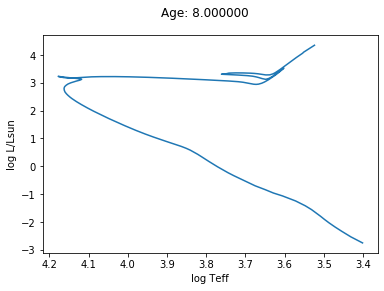

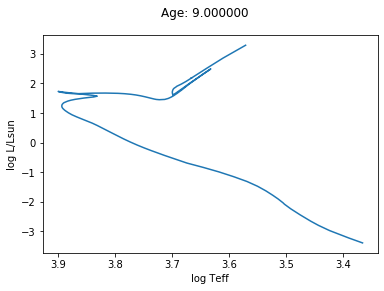

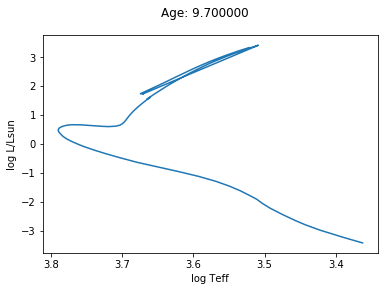

In [101]:
def isochrone(iso,age) :
    """ Plot isochrone
    """
    #select points of requested age
    gd=np.where(a[age_col] == age)[0]
 
    # plot isochrones
    plt.figure()
    plt.plot(iso[teff_col][gd],iso[logl_col][gd])
    plt.xlim(plt.xlim()[::-1])
    plt.xlabel('log Teff')
    plt.ylabel('log L/Lsun')
    plt.suptitle('Age: {:f}'.format(age))

isochrone(solar,8.0)
isochrone(solar,9.0)
isochrone(solar,9.7)

In [102]:
def contrib(iso,age,imf=salpeter) :
    """ Determine contribution to cumulative mass and luminosity as a function of mass for an isochrone
    
        Plot isochrone
        Plot cumulative fractions
    """
    #select points of requested age
    gd=np.where(iso[age_col] == age)[0]
        
    # get contibutions to cumulative fractions
    mtot=[]
    ltot=[]
    # the following loop implicitly assumes that entries are sorted by mass!  Could sort explicitly if needed...
    for index in gd[1:-1] :
        # bin width at this isochrone point
        dm = (iso[mass_col][index+1]-iso[mass_col][index-1])/2.
        
        # number of stars for this bin
        n = imf(np.atleast_1d(iso[mass_col][index]))*dm
        
        # contributions to cumulative mass and luminosity
        mtot.append(n*iso[mass_col][index])
        ltot.append(n*10.**iso[logl_col][index])

    # get the cumulative sums
    mcum = np.cumsum(mtot)
    lcum = np.cumsum(ltot)
    
    #plot fractional contributions
    plt.figure()
    plt.plot(a[mass_col][gd[1:-1]],mcum/mcum[-1],label='mass')
    plt.plot(a[mass_col][gd[1:-1]],lcum/lcum[-1],label='luminosity')
    plt.xlabel('Mass')
    plt.ylabel('Fractional contribution to sum')
    plt.suptitle('Age: {:f}'.format(age))
    plt.legend()

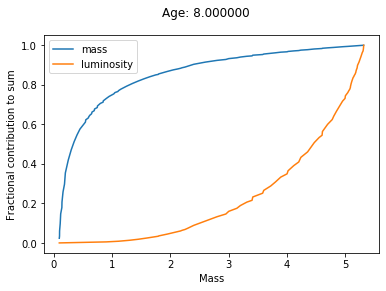

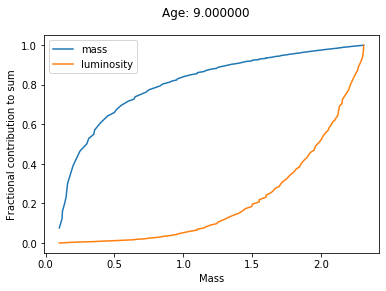

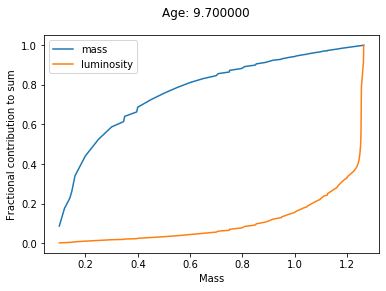

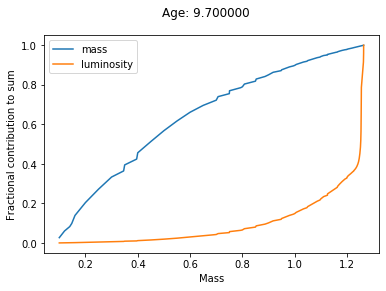

In [103]:
#100Myr
contrib(solar,8,imf=salpeter)
#1 Gyr
contrib(solar,9,imf=salpeter)
# 5 Gyr
contrib(solar,9.7,imf=salpeter)
# 5 Gyr KTG
contrib(solar,9.7,imf=ktg)


<h3> Composite stellar spectrum </h3>

(c) (5 points) A professional SPS model will incorporate stellar spectra in order to build the predicted spectrum for the stellar population. Here we will simplify this step by making the assumption that stars are all perfect blackbody sources, emitting a Planck spectrum at a given temperature. Using the isochrones and IMF used in part (b), “synthesize” a predicted spectrum for this simplified simple
stellar population at 100 Myr, 1 Gyr, and 5 Gyr. Make a plot of the results and discuss the implications, including how your predicted spectra compare to actual SPS model spectra at roughly these same ages and what stars are dominating different parts of the predicted spectra at different times.

For composite spectrum, calculate spectral contribution of each point, using Teff/logg/[M/H] to determine spectrum (for blackbody approximation, only depends on Teff). Weight each spectrum by the total luminosity of stars of each mass. For blackbody spectra that are normalized to give correct flux ($\sigma T_{eff}^4$):
$$ L = N 4 \pi R^2 BB(T_{eff}) $$